In [19]:
def plot_figures_lr(lrs):
    plt.figure(figsize=(15,5))
    for lr in lrs:
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,1)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,2)
        plt.semilogy(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.test_accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Accuracy')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')

    plt.legend(lrs)
    plt.tight_layout()
    plt.show()

def plot_figures_batch_sizes(batch_sizes):
    plt.figure(figsize=(15,5))
    for batch_size in batch_sizes:
        directory = get_directory(lr, dataset_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,1)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,2)
        #plt.semilogy(cur_epochs, train_graphs.eigs)
        plt.plot(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.test_accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Accuracy')

        plt.subplot(2,5,5)
        plt.semilogy(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')

    plt.legend(batch_sizes)
    plt.tight_layout()
    plt.show()

In [5]:
import sys
sys.path.append('..')
from main import graphs
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

loss_name = 'MSELoss'

def get_lookup_directory(lr, dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, **kwargs):
    results_dir = "results"
    directory = f"{results_dir}/{dataset_name}/{loss_name}/{opt_name}/{model_name}/"
    for key, value in kwargs.items():
        directory += f"{key}_{value}/"
    directory += f"lr_{lr}/moment_{momentum}/wd_{weight_decay}/batch_size_{batch_size}/"
    return directory

def get_running_directory(lr, dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs, **kwargs):
    return get_lookup_directory(lr, dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, **kwargs) + f"epoch_{epochs}/"

def get_directory(lr, dataset_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs, **kwargs):
    #results_dir = "results"
    #directory = f"{results_dir}/{model_name}/{dataset_name}/{opt_name}/lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/epoch_{epochs}/"
    directory = get_lookup_directory(lr, dataset_name, opt_name, model_name, momentum, weight_decay, batch_size, **kwargs) + f"epoch_{epochs}/run_0/"
    print(directory)
    return directory

In [ ]:
! python main.py --dataset cifar --model resnet18 --loss MSELoss --opt sgd --lr 0.001 --epoch 4000 --analysis loss eigs --batch_size 512

results/cifar/sgd/resnet18/lr_0.001/wd_0/batch_size_512/epoch_2000/
results/cifar/sgd/resnet18/lr_0.002/wd_0/batch_size_512/epoch_2000/
results/cifar/sgd/resnet18/lr_0.004/wd_0/batch_size_512/epoch_2000/


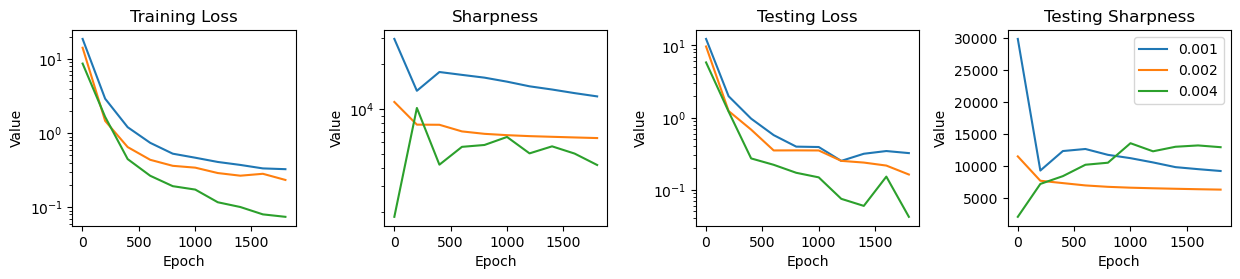

In [44]:
dataset_name, opt_name, weight_decay, batch_size, epochs = "cifar", "sgd", 0, 512, 2000
model_name = "resnet18"
model_params = {}

plot_figures_lr([0.001, 0.002, 0.004])

results/cifar/sgd/resnet18/lr_0.001/moment_0/wd_0/batch_size_128/epoch_2000/run_0/
results/cifar/sgd/resnet18/lr_0.001/moment_0/wd_0/batch_size_256/epoch_2000/run_0/
results/cifar/sgd/resnet18/lr_0.001/moment_0/wd_0/batch_size_512/epoch_2000/run_0/
results/cifar/sgd/resnet18/lr_0.001/moment_0/wd_0/batch_size_1024/epoch_2000/run_0/


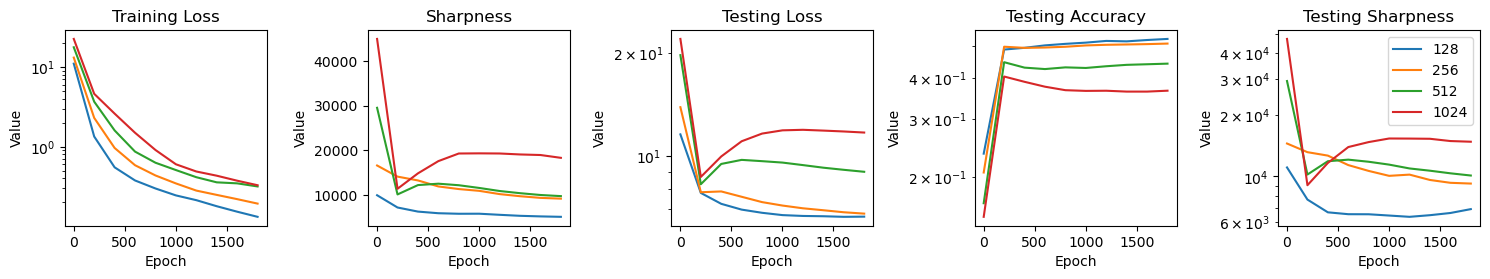

In [36]:
dataset_name, opt_name, momentum, weight_decay, batch_size, lr, epochs = "cifar", "sgd", 0, 0, 512, 0.001, 2000
model_name = "resnet18"
model_params = {}

#plot_figures_batch_sizes([512, 1024])
plot_figures_batch_sizes([128, 256, 512, 1024])

results/cifar/sgd/resnet18/lr_0.01/moment_0.9/wd_0.0005/batch_size_128/epoch_2000/run_0/


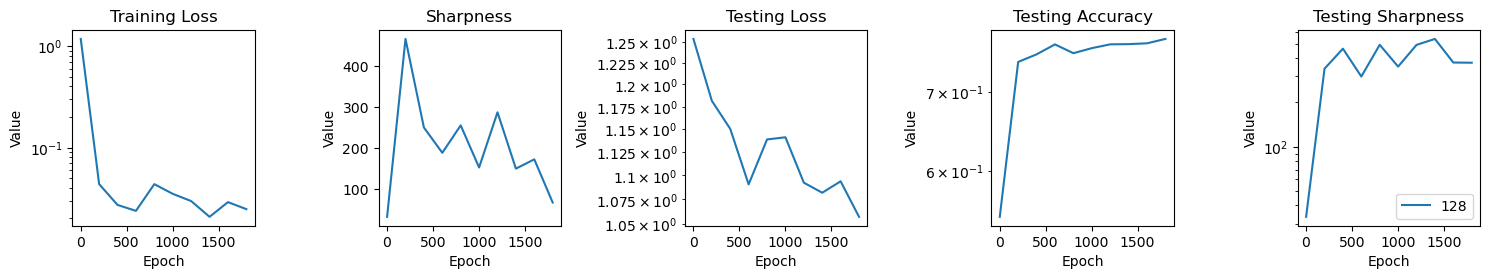

In [37]:
loss_name = 'CrossEntropyLoss'
lr, dataset_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0.9, 5e-4, 128, 2000
model_name = "resnet18"

plot_figures_batch_sizes([128])

In [ ]:
! python main.py --dataset cifar --model resnet18 --loss MSELoss --opt sgd --lr 0.001 --epoch 4000 --analysis loss eigs --batch_size 512 --multiple_run 1 --store_model_checkpoint 1

Text(0.5, 1.0, 'Training Loss')

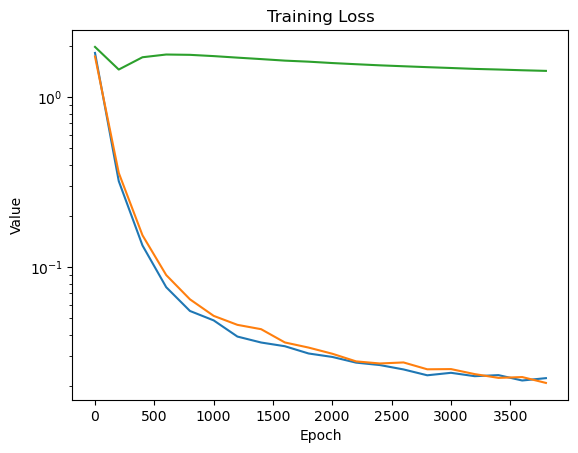

: 

In [11]:
loss_name = 'MSELoss'
lr, dataset_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "cifar", "sgd", 0, 0, 512, 4000
model_name = "resnet18"

directory = get_running_directory(lr, dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs)

for run in [1,2]:
    with open(f'../{directory}run_{run}/train_graphs.pk', 'rb') as f:
        train_graphs = pickle.load(f)
    cur_epochs = train_graphs.log_epochs
    plt.semilogy(cur_epochs, train_graphs.loss)
#plt.legend(['Loss + Weight Decay'])
with open(f'../{directory}avg_{12}/eval_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
cur_epochs = train_graphs.log_epochs
plt.semilogy(cur_epochs, train_graphs.loss)    

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss')

In [ ]:
! python main.py --dataset multi-view --model conv_with_last --loss MSELoss --opt sgd --lr 0.0005 --epoch 16000 --log_interval 50 --analysis loss eigs align --batch_size 512 --sp_train_size 512 --sp_feat_dim 200 --width 2

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_2/patch_dim_20/feat_dim_200/train_size_512/lr_0.0005/moment_0/wd_0/batch_size_512/epoch_32000/run_0/
results/multi-view/MSELoss/sgd/conv_with_last/nfilters_2/patch_dim_20/feat_dim_200/train_size_512/lr_0.002/moment_0/wd_0/batch_size_512/epoch_16000/run_0/


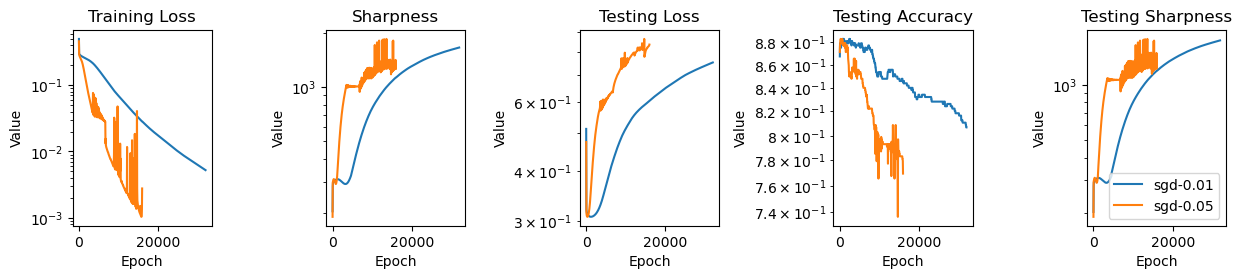

In [20]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 16000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 2, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.002, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.0005, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':32000}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.01',"sgd-0.05"], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_2/patch_dim_20/feat_dim_200/train_size_512/lr_0.002/moment_0/wd_0/batch_size_512/epoch_16000/run_0/


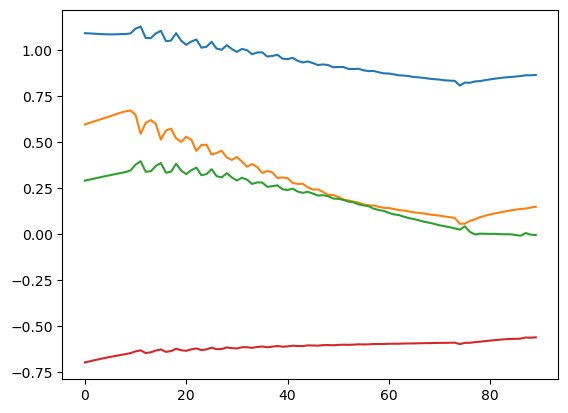

In [2]:
from plot_functions import get_attr, plot_max_2d
align = get_attr('sgd-0.05', model_params, opt_params, "align")
#plot_max_2d(align, 4, start=0, end=-1)
plot_max_2d(align, 4, start=60, end=150)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_1/patch_dim_20/feat_dim_200/train_size_512/lr_0.0008/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


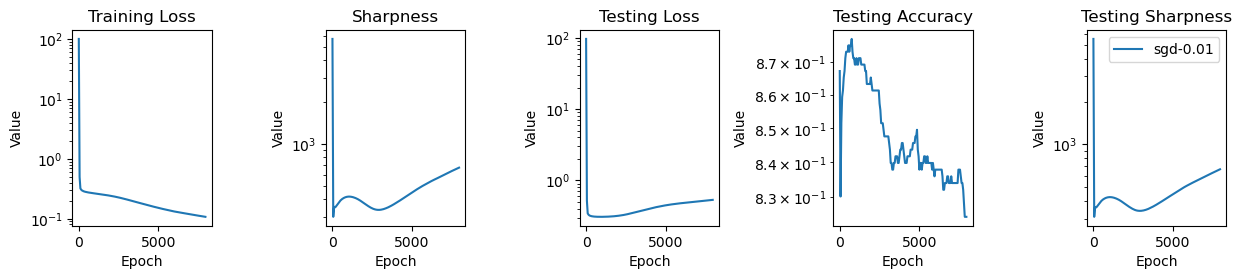

In [31]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 8000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 1, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.002, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.0008, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.01'], model_params, opt_params)

In [ ]:
! python main.py --dataset multi-view-orthogonal --model conv_with_last --loss MSELoss --opt sgd --lr 0.16 --epoch 16000 --log_interval 50 --analysis loss eigs align output --batch_size 512 --sp_train_size 512 --sp_feat_dim 200 --width 2000 --run_from_scratch 1

results/multi-view-orthogonal/MSELoss/sgd/conv_with_last/nfilters_2000/patch_dim_20/feat_dim_200/train_size_512/lr_0.16/moment_0/wd_0/batch_size_512/epoch_16000/run_0/


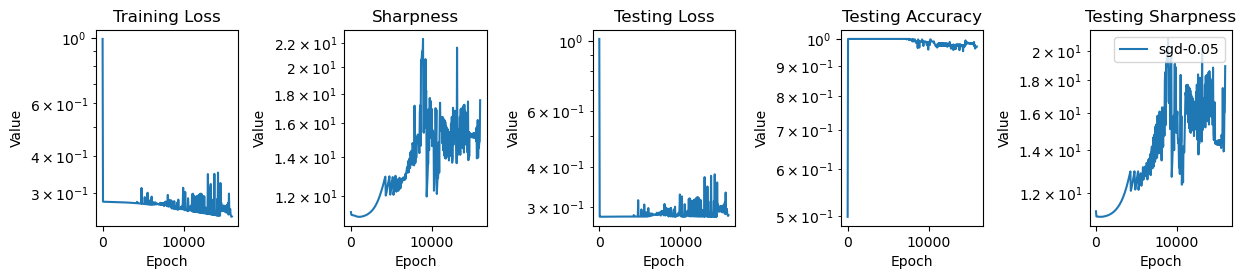

In [94]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view-orthogonal", 'MSELoss', 0, 0, 512, 16000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 2000, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.16, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.05'], model_params, opt_params)

results/multi-view-orthogonal/MSELoss/sgd/conv_with_last/nfilters_2000/patch_dim_20/feat_dim_200/train_size_512/lr_0.16/moment_0/wd_0/batch_size_512/epoch_16000/run_0/


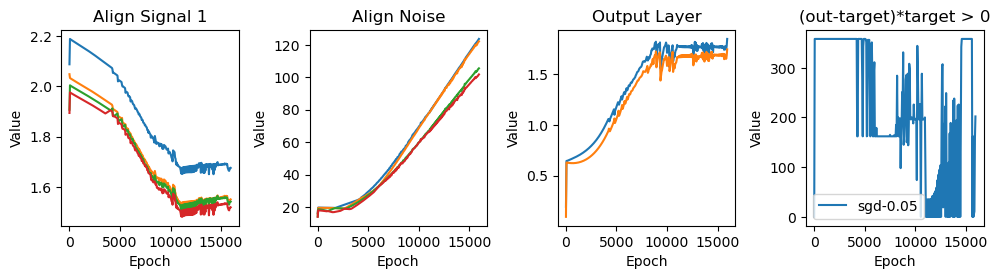

In [95]:
from plot_functions import plot_figures_align
plot_figures_align(["sgd-0.05"], model_params, opt_params, signal_nums=1)

In [ ]:
! python main.py --dataset multi-view-orthogonal --model conv_with_last --loss MSELoss --opt sgd --lr 0.2 --epoch 8000 --log_interval 50 --analysis loss eigs align output --batch_size 512 --sp_train_size 512 --sp_feat_dim 200 --sp_patch_dim 20 --width 500

results/multi-view-orthogonal/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.2/moment_0/wd_0/batch_size_512/epoch_24000/run_0/


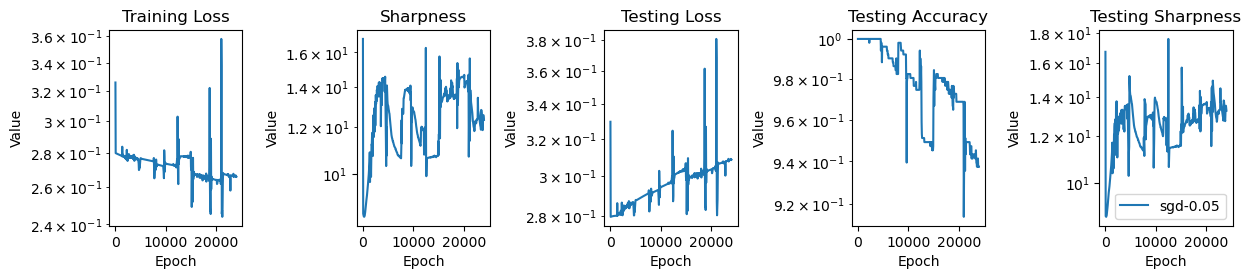

In [22]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view-orthogonal", 'MSELoss', 0, 0, 512, 24000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.2, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.05, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.05'], model_params, opt_params)

results/multi-view-orthogonal/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.2/moment_0/wd_0/batch_size_512/epoch_24000/run_0/


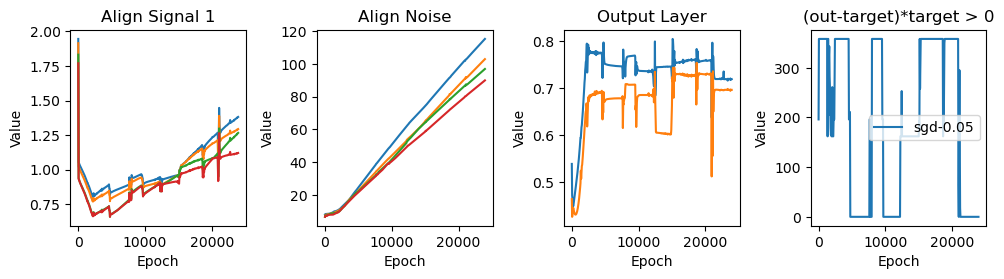

In [23]:
from plot_functions import plot_figures_align
plot_figures_align(["sgd-0.05"], model_params, opt_params, signal_nums=1)

In [ ]:
! python main.py --dataset multi-view --model conv_with_last --loss MSELoss --opt sgd --lr 0.05 --epoch 8000 --log_interval 50 --analysis loss eigs align output --batch_size 512 --sp_train_size 512 --sp_feat_dim 200 --sp_patch_dim 2 --width 500

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_2/feat_dim_200/train_size_512/lr_0.05/moment_0/wd_0/batch_size_512/epoch_8000/run_0/
results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_2/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


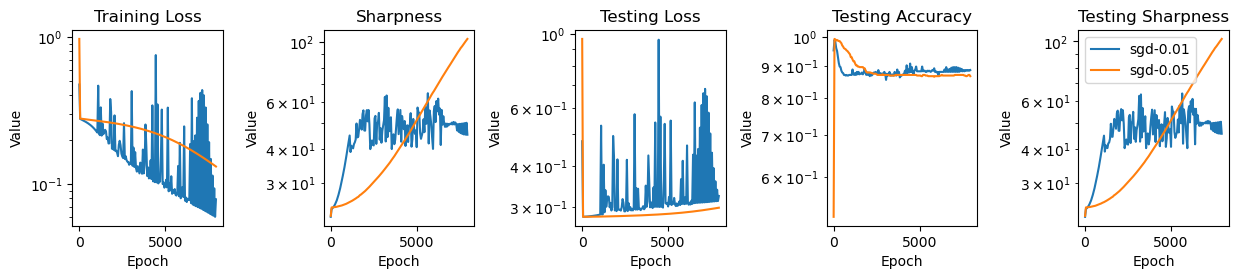

In [12]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 8000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 500, 2, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.012, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.05, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01", 'sgd-0.05'], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_2/feat_dim_200/train_size_512/lr_0.05/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


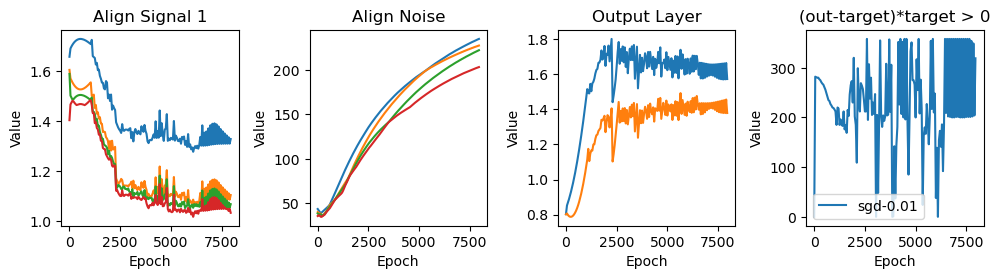

In [13]:
from plot_functions import plot_figures_align
plot_figures_align(["sgd-0.01"], model_params, opt_params, signal_nums=1)

In [ ]:
! python main.py --dataset multi-view --model conv_with_last --loss MSELoss --opt sgd --lr 0.012 --epoch 8000 --log_interval 50 --analysis loss eigs align output --batch_size 512 --sp_train_size 512 --sp_feat_dim 200 --width 500

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'graphs.graphs'>
results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.01/moment_0/wd_0/batch_size_512/epoch_8000/run_0/
results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


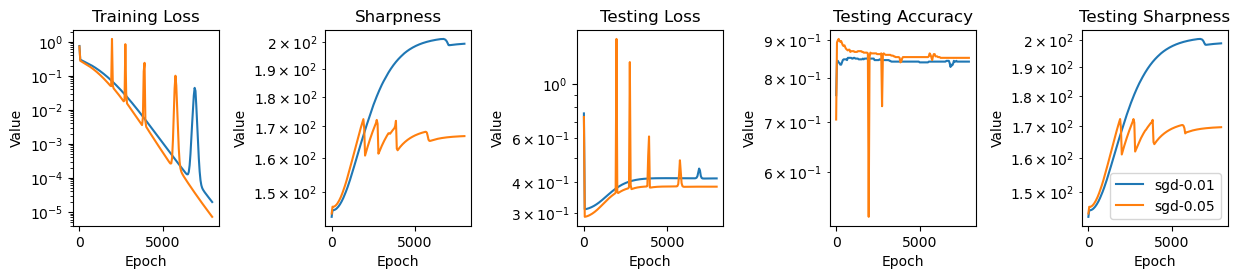

In [1]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 8000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.012, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01", 'sgd-0.05'], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


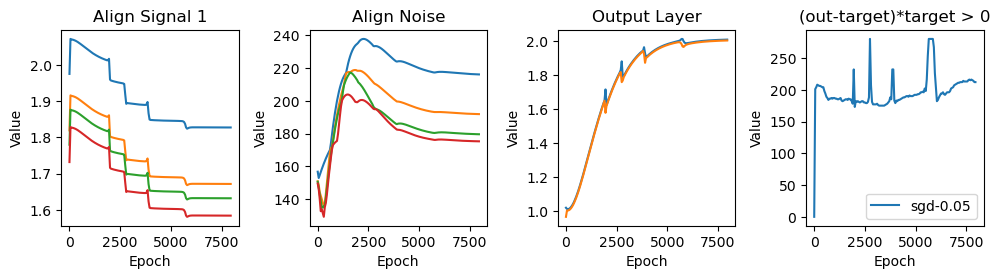

In [15]:
from plot_functions import plot_figures_align
plot_figures_align(["sgd-0.05"], model_params, opt_params, signal_nums=1)

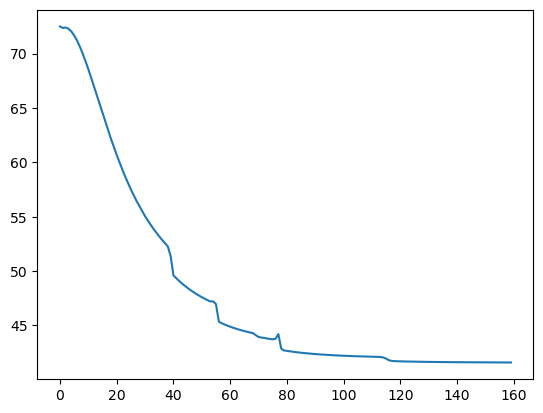

In [16]:
import matplotlib.pyplot as plt
plt.plot([eigs[i] / (out_layer[i][0]+out_layer[i][1]) for i in range(len(eigs))])

In [13]:
np.where(model_output[37] > 0)

(array([  1,   3,   5,   6,   7,  13,  14,  16,  17,  21,  22,  23,  24,
         25,  29,  30,  31,  34,  35,  36,  37,  39,  45,  47,  49,  50,
         52,  53,  56,  57,  58,  59,  60,  62,  71,  72,  74,  75,  77,
         79,  81,  82,  83,  84,  86,  87,  88,  91,  92,  94,  96,  97,
         99, 100, 106, 109, 111, 116, 119, 122, 123, 124, 125, 126, 130,
        135, 138, 141, 146, 147, 148, 151, 153, 155, 157, 159, 160, 161,
        162, 165, 166, 167, 168, 169, 170, 177, 178, 179, 180, 181, 182,
        184, 185, 188, 190, 191, 193, 194, 195, 196, 197, 199, 200, 203,
        206, 207, 210, 213, 215, 216, 218, 219, 226, 229, 231, 232, 233,
        234, 236, 237, 238, 241, 243, 245, 246, 248, 249, 251, 252, 253,
        254, 255, 260, 261, 263, 266, 268, 270, 271, 273, 274, 275, 276,
        279, 282, 285, 286, 291, 298, 299, 301, 306, 308, 309, 310, 314,
        315, 316, 317, 318, 320, 322, 323, 324, 327, 328, 331, 332, 333,
        336, 340, 341, 345, 347, 349, 355]),)

In [12]:
np.where(model_output[39] > 0)

(array([  1,   3,   5,   7,   8,   9,  10,  13,  14,  15,  16,  17,  21,
         23,  24,  25,  26,  29,  30,  31,  34,  35,  36,  37,  39,  40,
         41,  47,  49,  50,  51,  52,  56,  57,  58,  60,  61,  62,  66,
         67,  68,  71,  72,  74,  75,  77,  80,  81,  83,  84,  86,  87,
         88,  91,  92,  94,  96,  97, 100, 102, 103, 104, 105, 106, 107,
        109, 110, 111, 113, 115, 116, 117, 119, 122, 123, 124, 125, 126,
        130, 131, 132, 135, 138, 146, 147, 148, 151, 153, 156, 157, 159,
        160, 161, 165, 166, 167, 170, 174, 177, 179, 180, 181, 184, 185,
        187, 188, 189, 190, 191, 193, 194, 195, 196, 199, 202, 203, 206,
        207, 210, 215, 216, 218, 219, 223, 226, 227, 228, 229, 231, 232,
        234, 235, 236, 237, 238, 239, 240, 243, 247, 248, 249, 250, 251,
        253, 254, 255, 257, 259, 260, 261, 266, 267, 268, 271, 273, 274,
        275, 278, 279, 281, 282, 284, 285, 286, 289, 291, 295, 298, 299,
        301, 304, 305, 306, 308, 309, 317, 320, 323

In [32]:
np.where((align_signal[113] * align_signal[117]) < 0)[0].shape[0]

39

In [4]:
align_signal[0].shape

(1000,)

In [11]:
for i in range(30, 50):
    print(i, train_loss[i], eigs[i], out_layer[i][0], eigs[i] / out_layer[i][0], np.where((align_signal[i] * align_signal[i+1]) < 0)[0].shape[0])

30 0.07922542840242386 164.79270935058594 1.4940723180770874 110.2976792734362 0
31 0.0746859759092331 165.78802490234375 1.514553427696228 109.4633057313285 0
32 0.07033427059650421 166.78004455566406 1.5346503257751465 108.6762513613152 1
33 0.06616911292076111 167.74302673339844 1.554344892501831 107.9187943052998 1
34 0.06218773126602173 168.7476348876953 1.5736232995986938 107.23508919239401 1
35 0.05838779732584953 169.6947021484375 1.5924744606018066 106.56039160860938 2
36 0.054765306413173676 170.6047821044922 1.6108955144882202 105.90679567364315 0
37 0.0513203889131546 171.5546417236328 1.6289827823638916 105.31396868092246 2
38 0.04991590231657028 172.41781616210938 1.649182677268982 104.54743342783003 35
39 1.2161810398101807 169.23585510253906 1.7151590585708618 98.67064763285164 74
40 0.0512065514922142 160.754150390625 1.6226975917816162 99.06599430774247 0
41 0.04272130876779556 161.68812561035156 1.6357320547103882 98.8475619492454 0
42 0.03987337648868561 162.5780181

In [12]:
for i in range(105, 130):
    print(i, train_loss[i], eigs[i], out_layer[i][0], eigs[i] / out_layer[i][0], np.where((align_signal[i] * align_signal[i+1]) < 0)[0].shape[0])

105 0.00036248593823984265 167.6736602783203 1.985620141029358 84.44397637475475 0
106 0.0003333115018904209 167.76925659179688 1.9871480464935303 84.42715523276594 0
107 0.00030671257991343737 167.86019897460938 1.9885921478271484 84.41157688268216 0
108 0.0002830125449690968 167.9468536376953 1.9899471998214722 84.39764313985951 0
109 0.0002648714871611446 168.0293731689453 1.9911898374557495 84.38641560346927 0
110 0.0002682488993741572 168.10789489746094 1.992256760597229 84.38063718607555 0
111 0.0003915096167474985 168.18177795410156 1.9929741621017456 84.38733484469304 0
112 0.0012838796246796846 168.24603271484375 1.9928466081619263 84.42497883468467 0
113 0.007357968017458916 168.26365661621094 1.990411639213562 84.53711448486813 2
114 0.042492032051086426 167.9887237548828 1.9818627834320068 84.76304472702972 47
115 0.1006881445646286 166.96542358398438 1.9679303169250488 84.8431583923525 62
116 0.0522826611995697 165.72451782226562 1.9653644561767578 84.32253738049741 42
117

In [23]:
np.where((align_signal[41] * align_signal[42]) < 0)

(array([], dtype=int64),)

In [15]:
align_signal[40][15]

0.012231495

In [11]:
align_signal[39][15]

-0.061376706

In [10]:
align_signal[38][15]

0.01653609

In [64]:
[align_signal[i][37] for i in range(20,30)]

[-0.06878048,
 -0.07042744,
 -0.07202244,
 -0.07356069,
 -0.07503924,
 -0.07645844,
 -0.077821665,
 -0.079127036,
 -0.080381624,
 -0.08158533]

In [21]:
print(train_loss[38], train_loss[39], train_loss[40], train_loss[41])

0.04991590231657028 1.2161810398101807 0.0512065514922142 0.04272130876779556


In [18]:
np.where((align_signal[38] * align_signal[40]) < 0)

(array([  7,   9,  20,  32,  37,  38,  53,  59,  72,  75,  90,  95, 101,
        118, 129, 135, 154, 155, 165, 189, 206, 208, 213, 219, 229, 230,
        236, 248, 252, 261, 262, 280, 290, 299, 310, 312, 328, 363, 385,
        423, 424, 429, 442, 445, 453, 457, 482, 499, 503, 517, 527, 553,
        575, 580, 588, 602, 616, 635, 660, 663, 671, 687, 704, 741, 748,
        752, 758, 764, 787, 812, 859, 861, 864, 917, 931, 939, 950]),)

In [9]:
np.where((align_signal[38] * align_signal[39]) < 0)

(array([ 15,  43,  72,  75,  90, 101, 126, 127, 154, 199, 208, 213, 261,
        278, 328, 445, 575, 591, 655, 660, 687, 709, 741, 748, 758, 764,
        785, 821, 857, 860, 868, 931, 950, 957, 979]),)

In [8]:
np.where((align_signal[40] * align_signal[39]) < 0)

(array([  7,   9,  15,  20,  32,  37,  38,  43,  53,  59,  95, 118, 126,
        127, 129, 135, 155, 165, 189, 199, 206, 219, 229, 230, 236, 248,
        252, 262, 278, 280, 290, 299, 310, 312, 363, 385, 423, 424, 429,
        442, 453, 457, 482, 499, 503, 517, 527, 553, 580, 588, 591, 602,
        616, 635, 655, 663, 671, 704, 709, 752, 785, 787, 812, 821, 857,
        859, 860, 861, 864, 868, 917, 939, 957, 979]),)

In [12]:
align_signal[38]

array([-3.06195468e-01, -6.58777356e-02, -1.00905991e+00, -3.92927647e-01,
       -3.80200744e-01,  1.37338805e+00, -2.26133525e-01,  2.78956443e-03,
        3.05429488e-01, -5.71737811e-02,  4.06153083e-01,  8.16747785e-01,
       -7.22851872e-01,  1.68627307e-01, -2.10227609e-01,  3.33925709e-04,
        2.22564846e-01, -6.51861966e-01,  2.72306986e-02, -1.21426368e+00,
       -5.84439039e-02,  4.27292109e-01,  6.43669784e-01, -3.35181564e-01,
        4.34077680e-01, -8.24622661e-02, -1.37040079e-01,  6.54496431e-01,
       -2.71535397e-01, -1.12674221e-01,  3.87151659e-01,  1.98548622e-02,
       -4.37651202e-02,  9.39157680e-02, -6.04469299e-01, -5.64887822e-01,
       -8.95500958e-01, -4.80778180e-02, -3.07475254e-02,  5.98770916e-01,
       -6.81216478e-01,  3.33872676e-01, -6.62209511e-01,  6.51519652e-03,
        6.80324972e-01, -6.69376731e-01, -1.02039956e-01,  8.75560582e-01,
       -6.26235187e-01,  3.93844992e-01,  2.10365325e-01,  1.05872117e-01,
        1.04372382e+00, -

In [2]:
from plot_functions import get_attr
import numpy as np

model_output = get_attr('sgd-0.05', model_params, opt_params, 'model_output')
np.sum(model_output[0] > 0)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


0

In [2]:
from plot_functions import get_attr
import numpy as np
align_signal = get_attr('sgd-0.05', model_params, opt_params, 'align_signal_1')
train_loss = get_attr('sgd-0.05', model_params, opt_params, 'loss')
eigs = get_attr('sgd-0.05', model_params, opt_params, 'eigs')
out_layer = get_attr('sgd-0.05', model_params, opt_params, "out_layer")
for i in range(100,130):
    print(i, train_loss[i])

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/
results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/
results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/
results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/
100 0.0005534413503482938
101 0.0005083312280476093
102 0.0004669810878112912
103 0.00042908382602036
104 0.00039433708298020065
105 0.00036248593823984265
106 0.0003333115018904209
107 0.00030671257991343737
108 0.0002830125449690968
109 0.0002648714871611446
110 0.0002682488993741572
111 0.0003915096167474985
112 0.0012838796246796846
113 0.007357968017458916
114 0.042492

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'graphs.graphs'>
results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.01/moment_0/wd_0/batch_size_512/epoch_8000/run_0/
results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


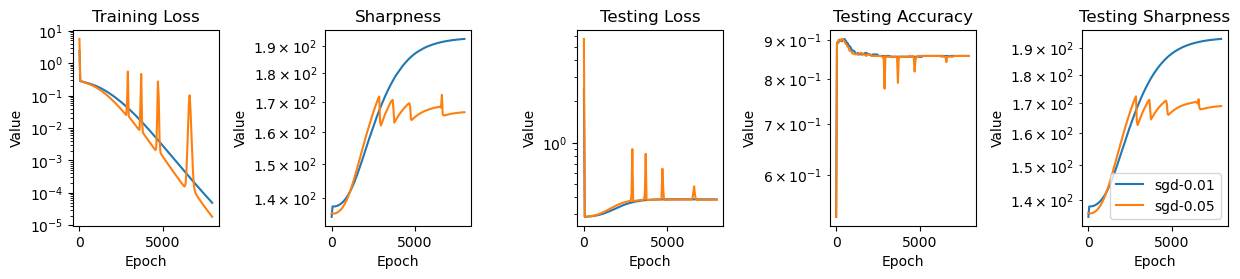

In [1]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 8000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.012, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01", 'sgd-0.05'], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


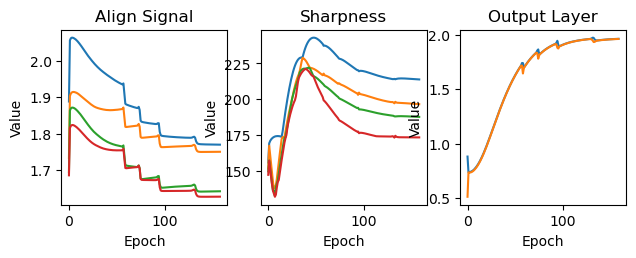

In [3]:
from plot_functions import plot_figures_align

plot_figures_align(["sgd-0.05"], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


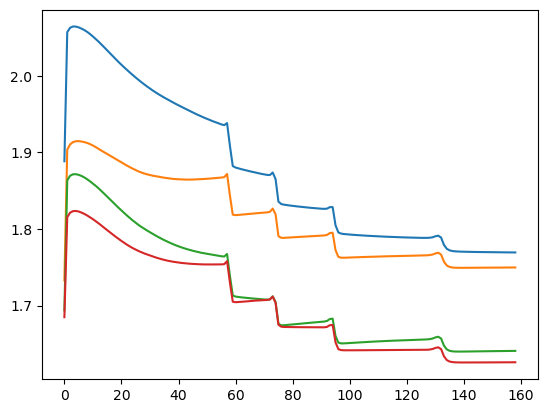

In [16]:
from plot_functions import get_attr, plot_max_2d
align = get_attr('sgd-0.05', model_params, opt_params, "align_signal")
plot_max_2d(align, 4)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


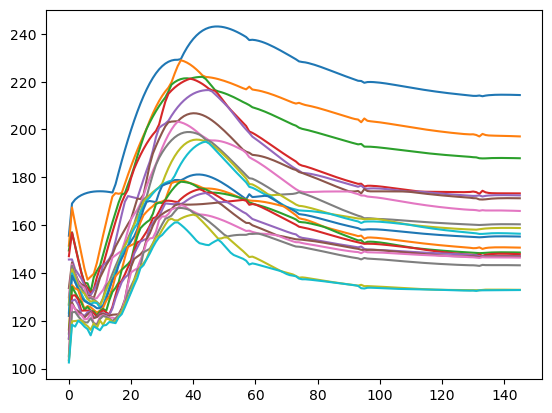

In [15]:
from plot_functions import get_attr, plot_max_2d
#align = get_attr('sgd-0.05', model_params, opt_params, "align_signal")
#plot_max_2d(align, 4)
align = get_attr('sgd-0.05', model_params, opt_params, "align_noise")
plot_max_2d(align, 20)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_10/patch_dim_2/feat_dim_200/train_size_512/lr_0.005/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


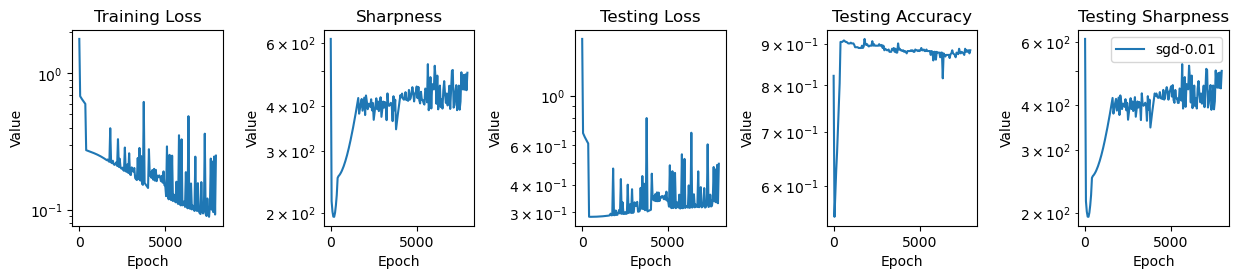

In [4]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 8000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 10, 2, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.012, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.005, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01"], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_10/patch_dim_2/feat_dim_200/train_size_512/lr_0.005/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


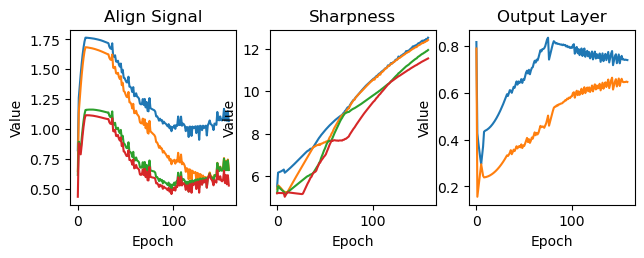

In [5]:
from plot_functions import plot_figures_align
plot_figures_align(["sgd-0.01"], model_params, opt_params)

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'graphs.graphs'>
results/multi-view/MSELoss/sgd/conv_with_last/nfilters_2/patch_dim_2/feat_dim_200/train_size_512/lr_0.0008/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


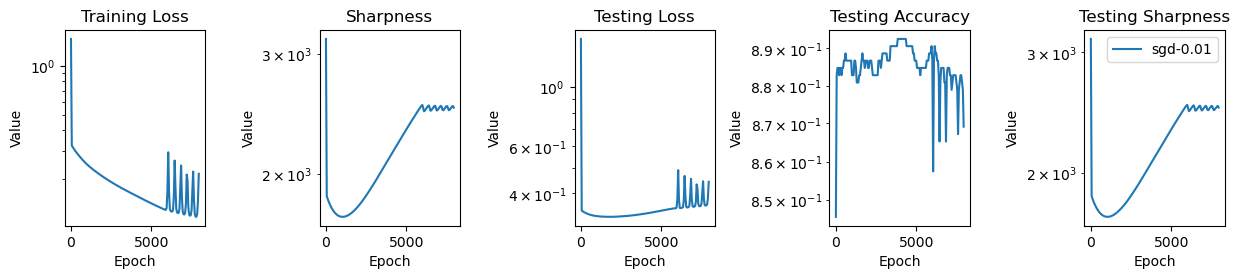

In [1]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 8000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 2, 2, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.012, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.0008, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01"], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_2/patch_dim_2/feat_dim_200/train_size_512/lr_0.0008/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


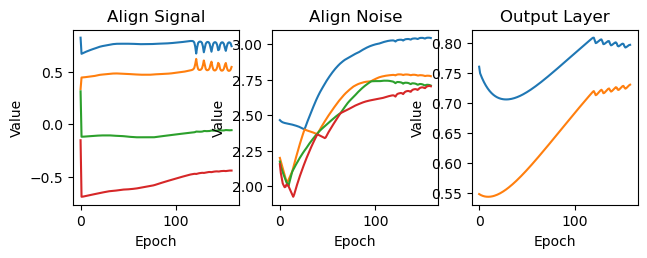

In [2]:
from plot_functions import plot_figures_align
plot_figures_align(["sgd-0.01"], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_2/patch_dim_2/feat_dim_200/train_size_512/lr_0.001/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


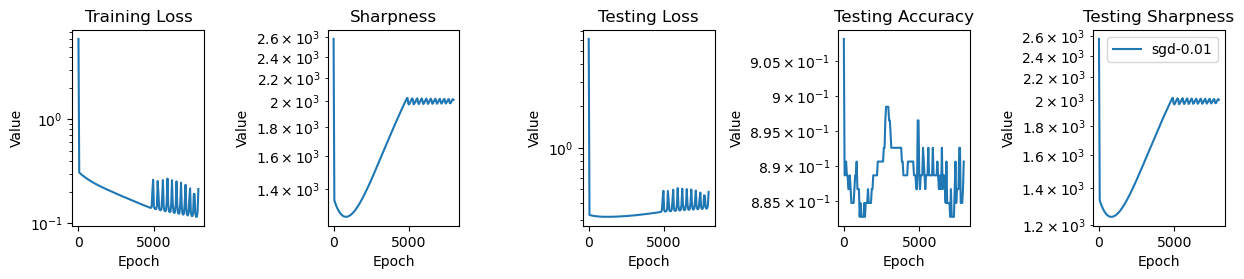

In [7]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 8000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 2, 2, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.012, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.001, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01"], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_2/patch_dim_2/feat_dim_200/train_size_512/lr_0.001/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


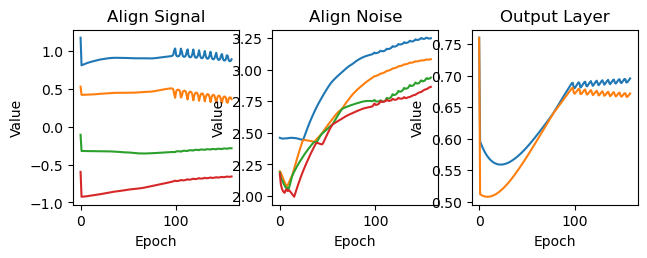

In [8]:
from plot_functions import plot_figures_align
plot_figures_align(["sgd-0.01"], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_1/patch_dim_2/feat_dim_200/train_size_512/lr_0.0004/moment_0/wd_0/batch_size_512/epoch_16000/run_0/


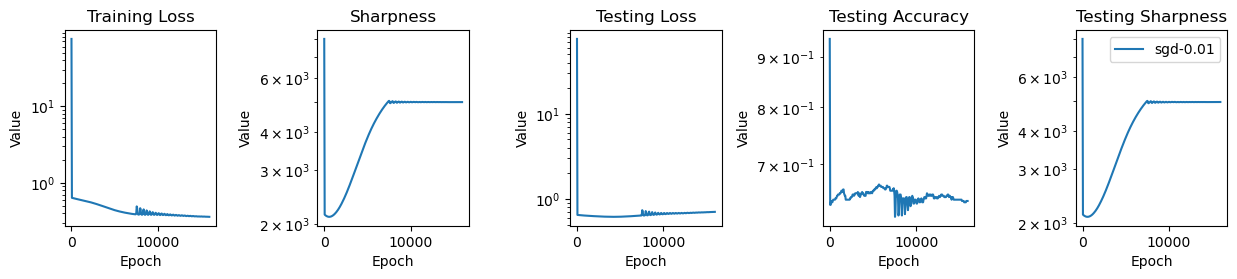

In [15]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 16000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 1, 2, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.012, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.0004, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01"], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_1/patch_dim_2/feat_dim_200/train_size_512/lr_0.0004/moment_0/wd_0/batch_size_512/epoch_16000/run_0/


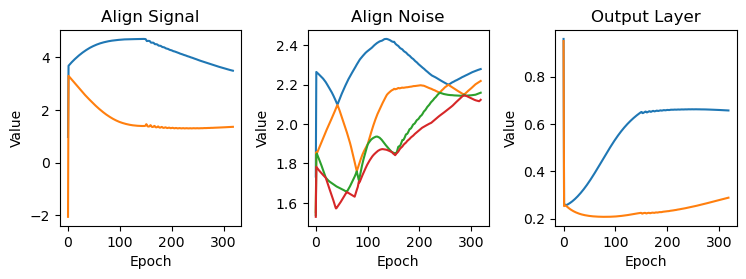

In [16]:
from plot_functions import plot_figures_align
plot_figures_align(["sgd-0.01"], model_params, opt_params)

In [ ]:
! python main.py --dataset secondary_feature --model conv_with_last --loss MSELoss --opt sgd --lr 0.0004 --epoch 16000 --log_interval 50 --analysis loss eigs align --batch_size 512 --sp_train_size 512 --sp_patch_dim 2 --sp_feat_dim 200 --width 2

results/secondary_feature/MSELoss/sgd/conv_with_last/nfilters_2/patch_dim_2/feat_dim_200/train_size_512/lr_0.0006/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


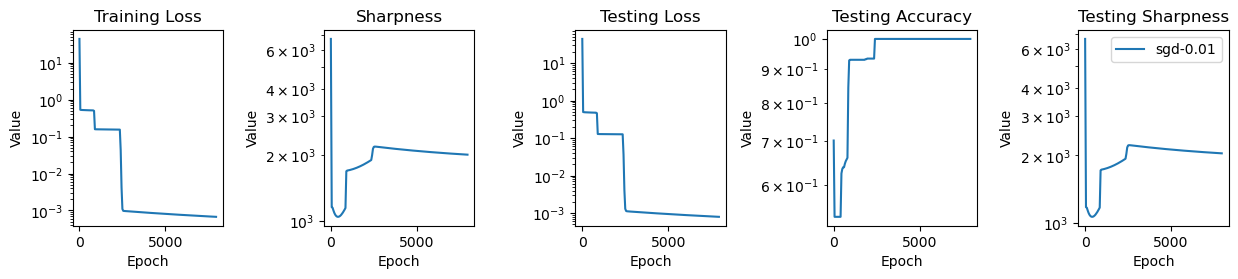

In [10]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "secondary_feature", 'MSELoss', 0, 0, 512, 8000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 2, 2, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.012, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.0006, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01"], model_params, opt_params)

results/secondary_feature/MSELoss/sgd/conv_with_last/nfilters_2/patch_dim_2/feat_dim_200/train_size_512/lr_0.0006/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


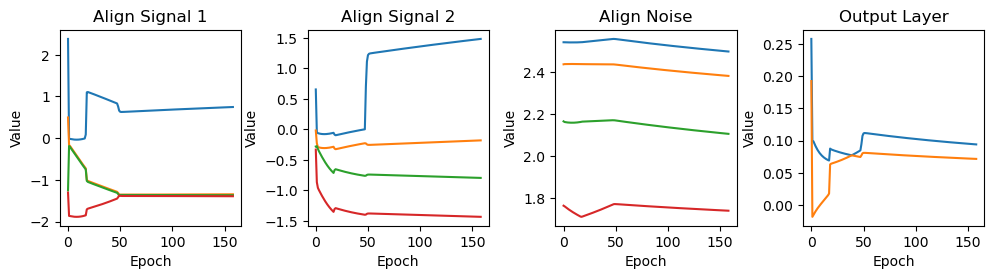

In [11]:
from plot_functions import plot_figures_align
plot_figures_align(["sgd-0.01"], model_params, opt_params, signal_nums=2)

In [ ]:
! python main.py --dataset spurious-2d --model conv_with_last --loss MSELoss --opt sgd --lr 0.01 --epoch 8000 --log_interval 50 --analysis loss eigs align --batch_size 512 --sp_train_size 512 --sp_patch_dim 20 --sp_feat_dim 200 --width 500

results/spurious-2d/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.022/moment_0.0/wd_0/batch_size_512/epoch_8000/run_0/
results/spurious-2d/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.02/moment_0.0/wd_0/batch_size_512/epoch_8000/run_0/


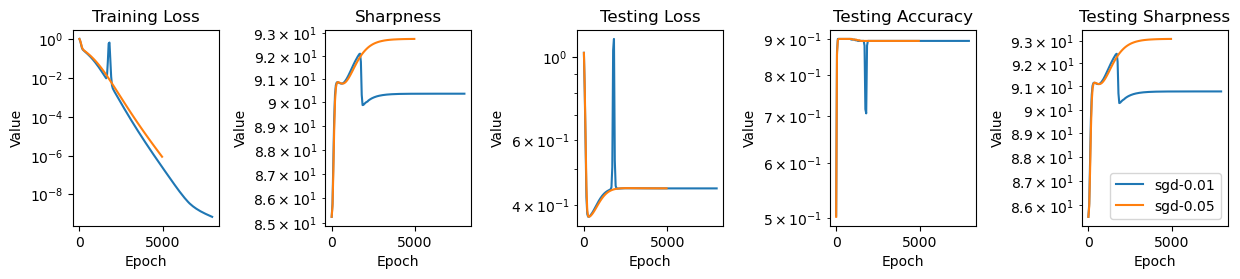

In [51]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "spurious-2d", '1', 0.0, 0, 512, 8000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.02, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.022, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01", 'sgd-0.05'], model_params, opt_params)

results/spurious-2d/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.022/moment_0.0/wd_0/batch_size_512/epoch_8000/run_0/


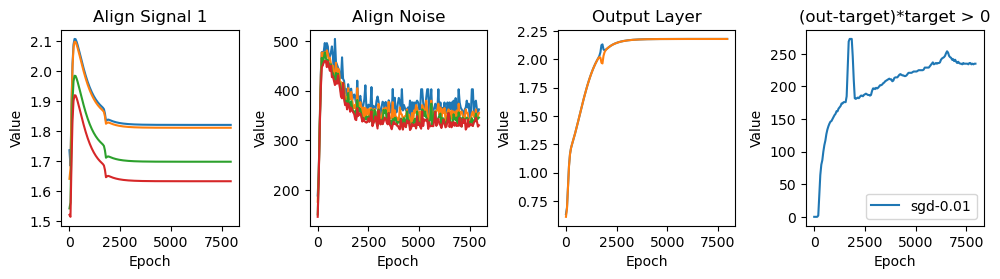

In [50]:
from plot_functions import plot_figures_align
plot_figures_align(["sgd-0.01"], model_params, opt_params, signal_nums=1)

In [36]:
from plot_functions import get_attr
align_signal = get_attr("sgd-0.01", model_params, opt_params, "align_signal_1")

results/spurious-2d/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.022/moment_0.0/wd_0/batch_size_512/epoch_8000/run_0/


In [45]:
len(align_signal)

160

In [49]:
import numpy as np
for i in range(1, 30):
    print(i, np.where((align_signal[i] * align_signal[i+1]) < 0)[0].shape[0])

1 110
2 69
3 21
4 11
5 1
6 1
7 9
8 3
9 1
10 4
11 6
12 7
13 4
14 10
15 5
16 4
17 2
18 5
19 7
20 7
21 8
22 1
23 3
24 1
25 4
26 2
27 1
28 1
29 1


results/spurious-2d/MSELoss/sgd/conv_with_last/nfilters_200/patch_dim_20/feat_dim_200/train_size_512/lr_0.01/moment_0.0/wd_0/batch_size_512/epoch_8000/run_0/
results/spurious-2d/MSELoss/sgd/conv_with_last/nfilters_200/patch_dim_20/feat_dim_200/train_size_512/lr_0.022/moment_0.0/wd_0/batch_size_512/epoch_8000/run_0/


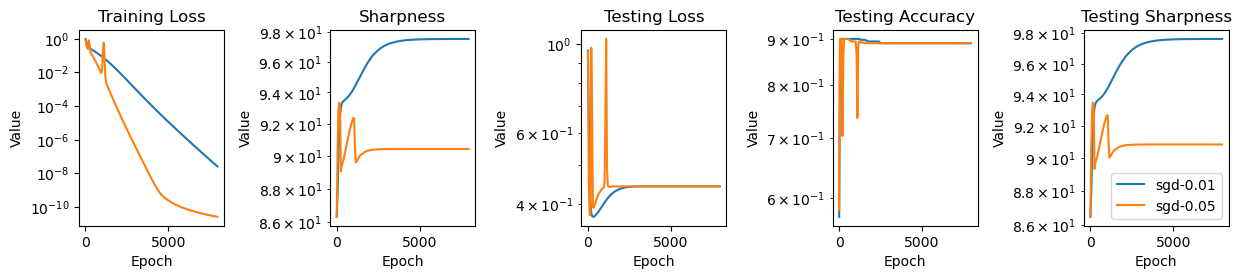

In [8]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "spurious-2d", 'MSELoss', 0.0, 0, 512, 8000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 200, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.022, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01", 'sgd-0.05'], model_params, opt_params)

results/spurious-2d/MSELoss/sgd/conv_with_last/nfilters_200/patch_dim_20/feat_dim_200/train_size_512/lr_0.022/moment_0.0/wd_0/batch_size_512/epoch_8000/run_0/


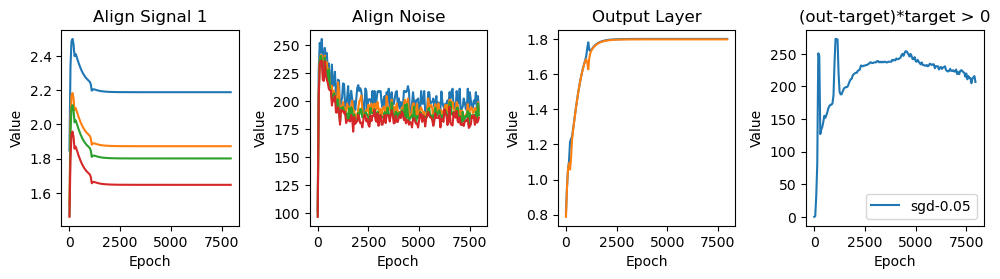

In [9]:
from plot_functions import plot_figures_align
plot_figures_align(["sgd-0.05"], model_params, opt_params, signal_nums=1)

In [ ]:
! python main.py --dataset orthogonal --model conv_with_last --loss MSELoss --opt sgd --lr 0.1 --epoch 2000 --log_interval 50 --analysis loss eigs activation --batch_size 5 --sp_train_size 5 --sp_patch_dim 2 --sp_feat_dim 200 --width 200 --run_from_scratch 1

results/orthogonal/MSELoss/sgd/conv_with_last/nfilters_200/patch_dim_2/feat_dim_200/train_size_5/lr_3.0/moment_0.0/wd_0/batch_size_5/epoch_50/run_0/


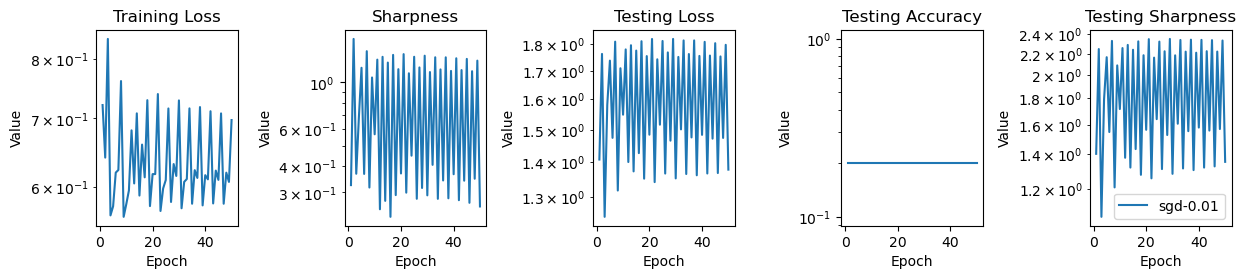

In [5]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 3, "orthogonal", 'MSELoss', 0.0, 0, 5, 50
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 200, 2, 200, 5
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.022, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 3.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01"], model_params, opt_params)

In [10]:
activation[0][0].shape

(800,)

In [6]:
from plot_functions import get_attr
activation = get_attr("sgd-0.01", model_params, opt_params, "activation_pattern")
linear_coefs = get_attr("sgd-0.01", model_params, opt_params, "linear_coefs")

results/orthogonal/MSELoss/sgd/conv_with_last/nfilters_200/patch_dim_2/feat_dim_200/train_size_5/lr_3.0/moment_0.0/wd_0/batch_size_5/epoch_50/run_0/
results/orthogonal/MSELoss/sgd/conv_with_last/nfilters_200/patch_dim_2/feat_dim_200/train_size_5/lr_3.0/moment_0.0/wd_0/batch_size_5/epoch_50/run_0/


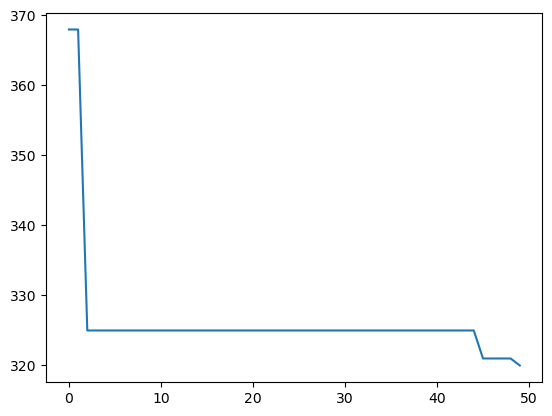

In [7]:
import numpy as np
import matplotlib.pyplot as plt
activated_neuron = [np.sum(activation[i][1]) for i in range(len(activation))]
plt.plot(activated_neuron)

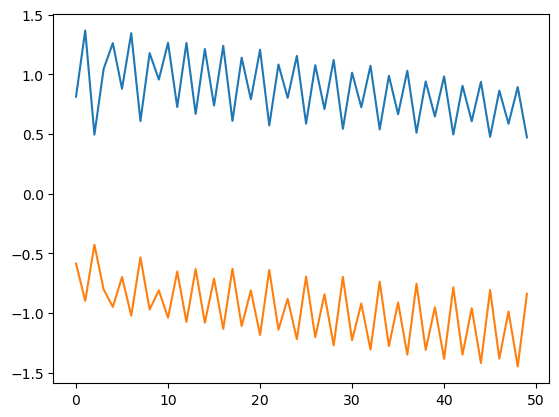

In [17]:
from plot_functions import plot_max_2d
plot_max_2d(linear_coefs, 2)

In [ ]:
! python main.py --dataset scalarized --model scalarized_conv --loss MSELoss --opt sgd --lr 0.01 --epoch 2000 --log_interval 50 --analysis loss eigs activation --batch_size 5 --sp_train_size 5 --sp_patch_dim 2 --width 200 --run_from_scratch 1

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'graphs.graphs'>
results/scalarized/MSELoss/sgd/scalarized_conv/nfilters_200/patch_dim_5/train_size_5/lr_0.0062/moment_0.0/wd_0/batch_size_5/epoch_10000/run_0/


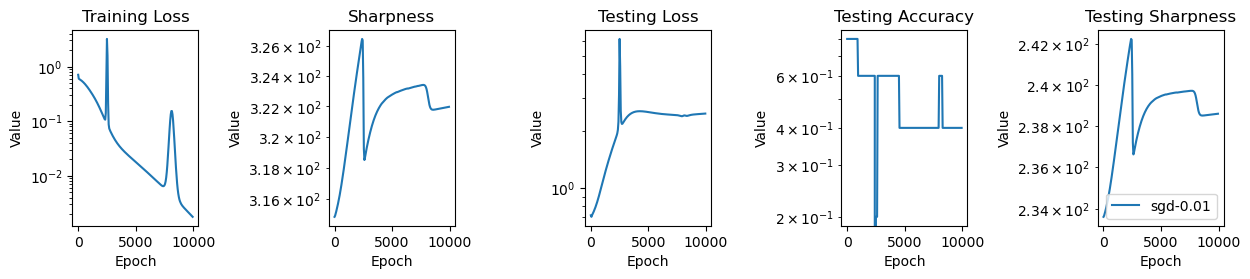

In [1]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 3, "scalarized", 'MSELoss', 0.0, 0, 5, 10000
model_name = "scalarized_conv"
nfilters, patch_dim, train_size = 200, 5, 5
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.022, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.0062, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01"], model_params, opt_params)

results/scalarized/MSELoss/sgd/scalarized_conv/nfilters_200/patch_dim_5/train_size_5/lr_0.0062/moment_0.0/wd_0/batch_size_5/epoch_10000/run_0/


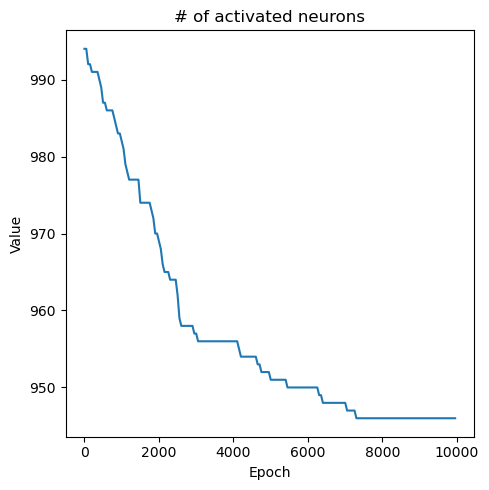

In [3]:
from plot_functions import plot_attr_figure
plot_attr_figure(["sgd-0.01"], model_params, opt_params, "activation_pattern")

In [ ]:
! python main.py --dataset scalarized --model scalarized_conv --loss MSELoss --opt sgd --lr 0.01 --epoch 2000 --log_interval 50 --analysis loss eigs activation --batch_size 5 --sp_train_size 5 --sp_patch_dim 2 --width 200 --run_from_scratch 1

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'graphs.graphs'>
results/scalarized/MSELoss/sgd/scalarized_conv/nfilters_200/patch_dim_5/train_size_5/lr_0.12/moment_0.0/wd_0/batch_size_5/epoch_4000/run_0/


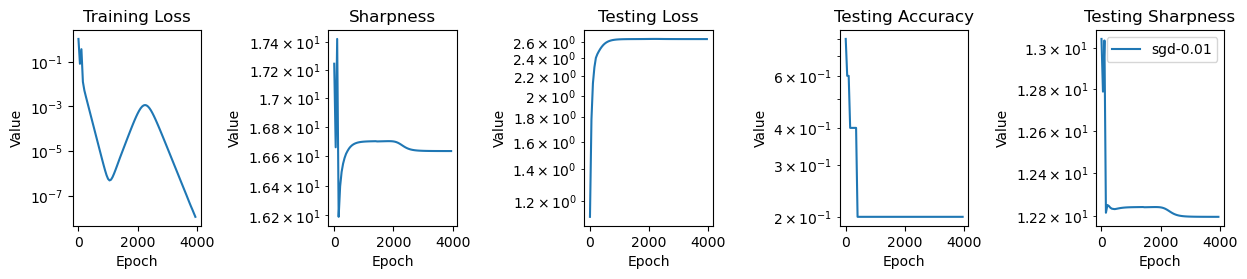

In [1]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 3, "scalarized", 'MSELoss', 0.0, 0, 5, 4000
model_name = "scalarized_conv"
nfilters, patch_dim, train_size = 200, 5, 5
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.022, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.12, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01"], model_params, opt_params)

results/scalarized/MSELoss/sgd/scalarized_conv/nfilters_200/patch_dim_5/train_size_5/lr_0.12/moment_0.0/wd_0/batch_size_5/epoch_4000/run_0/


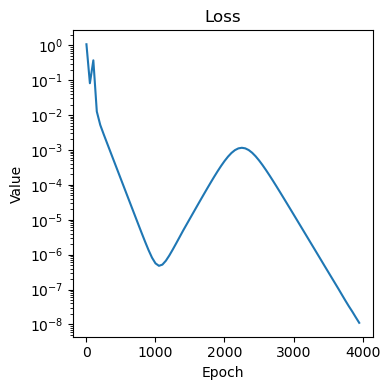

results/scalarized/MSELoss/sgd/scalarized_conv/nfilters_200/patch_dim_5/train_size_5/lr_0.12/moment_0.0/wd_0/batch_size_5/epoch_4000/run_0/


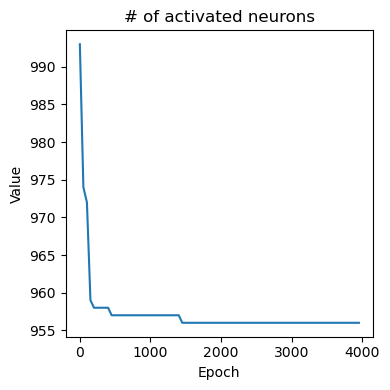

In [2]:
from plot_functions import plot_attr_figure
plot_attr_figure(["sgd-0.01"], model_params, opt_params, "loss")
plot_attr_figure(["sgd-0.01"], model_params, opt_params, "activation_pattern")

In [3]:
from plot_functions import get_attr, plot_max_2d
linear_coefs = get_attr("sgd-0.01", model_params, opt_params, "linear_coefs")
plot_max_2d(linear_coefs, 2)

results/scalarized/MSELoss/sgd/scalarized_conv/nfilters_200/patch_dim_5/train_size_5/lr_0.12/moment_0.0/wd_0/batch_size_5/epoch_4000/run_0/


IndexError: list index out of range

In [15]:
from plot_functions import get_attr
activation = get_attr("sgd-0.01", model_params, opt_params, "activation_pattern")

results/scalarized/MSELoss/sgd/scalarized_conv/nfilters_200/patch_dim_5/train_size_5/lr_0.0062/moment_0.0/wd_0/batch_size_5/epoch_10000/run_0/


results/scalarized/MSELoss/sgd/scalarized_conv/nfilters_200/patch_dim_5/train_size_5/lr_0.0062/moment_0.0/wd_0/batch_size_5/epoch_10000/run_0/


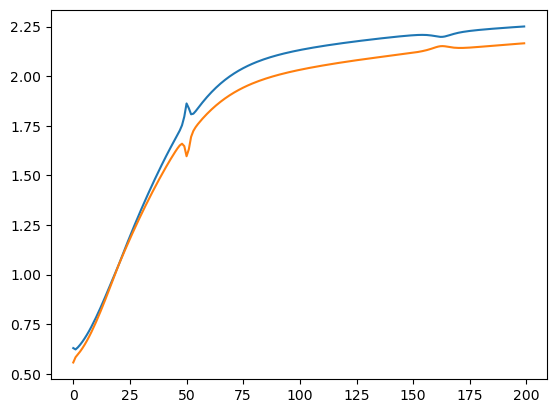

In [7]:
from plot_functions import get_attr, plot_max_2d
linear_coefs = get_attr("sgd-0.01", model_params, opt_params, "linear_coefs")
plot_max_2d(linear_coefs, 2)

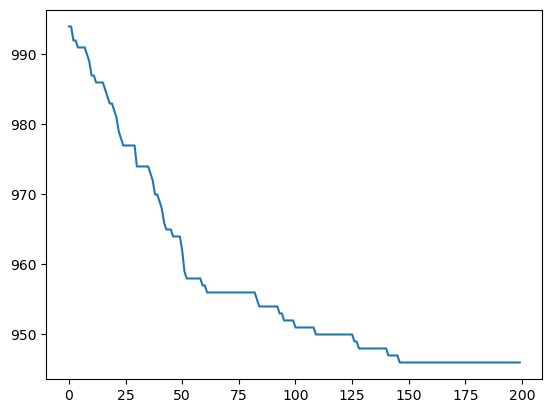

In [17]:
import numpy as np
import matplotlib.pyplot as plt
activated_neuron = [np.sum(activation[i][1]) for i in range(len(activation))]
plt.plot(activated_neuron)

results/scalarized/MSELoss/sgd/scalarized_conv/nfilters_200/patch_dim_5/train_size_5/lr_0.0062/moment_0.0/wd_0/batch_size_5/epoch_10000/run_0/


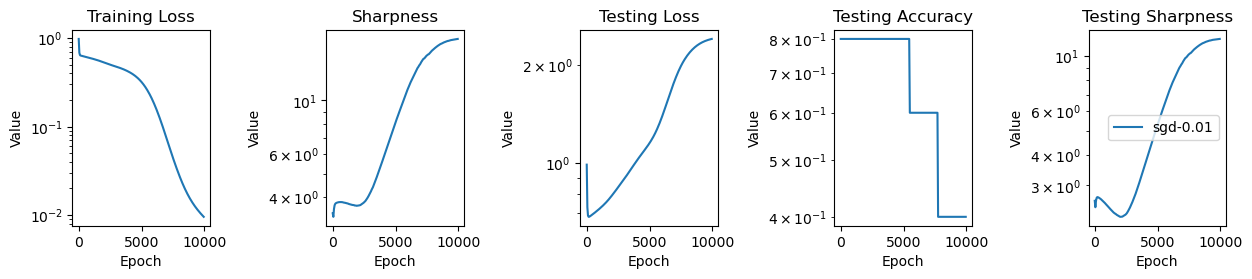

In [2]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 3, "scalarized", 'MSELoss', 0.0, 0, 5, 10000
model_name = "scalarized_conv"
nfilters, patch_dim, train_size = 200, 5, 5
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
#model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.022, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.0062, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01"], model_params, opt_params)

results/scalarized/MSELoss/sgd/scalarized_conv/nfilters_200/patch_dim_5/train_size_1/lr_0.36/moment_0.0/wd_0/batch_size_1/epoch_2000/run_0/


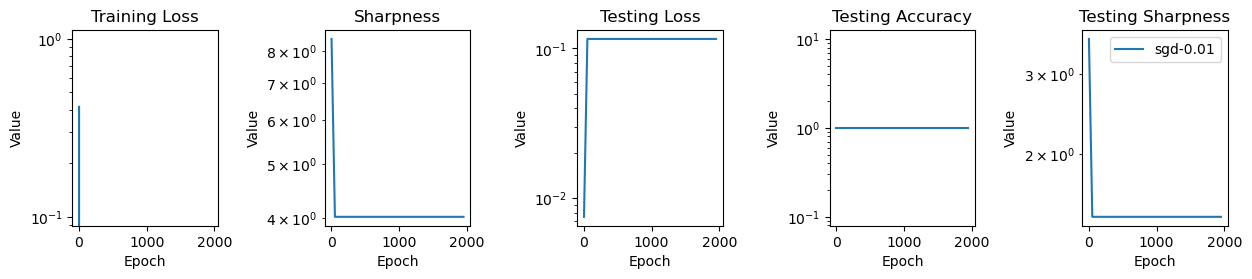

In [19]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 3, "scalarized", 'MSELoss', 0.0, 0, 1, 2000
model_name = "scalarized_conv"
nfilters, patch_dim, train_size = 200, 5, 1
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
#model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.022, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.36, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01"], model_params, opt_params)